# Virtual Synthesis

In [87]:
from pippi.soundbuffer import SoundBuffer
from pippi import dsp,fx
import numpy as np
import pandas as pd
import sounddevice as sd
import helpers as hp
import param_generation as pg
import _pickle as pickle
from IPython.display import Audio
import librosa
import librosa.feature
import imp 
imp.reload(hp)
sr=48000

# Synthesizer Module Paramters:

In [144]:
class Synth_Module():
    def __init__(self,params):
        buff=SoundBuffer(channels=1)
        length=1
        if params.isNoise==1:
            buff = noise.bln(params.getOscType(),params.getLength(),30,
                150000,channels=1) 
        else:
            buff = Osc(str(params.getOscType()), freq=list(params.getPitches()),
                       channels=1).play(params.getLength()) 

        buff=buff.adsr(a=params.A, d=params.D, s=params.S, r=params.R)
        bpfilter=params.getBandPass()
        buff.frames = helpers.butter_bandpass_filter(buff.frames,bpfilter[0],bpfilter[1], 
                                                     sr, order=bpfilter[2])
        #a high pass 
        buff.frames = helpers.butter_bandpass_filter(buff.frames,80,15000, 
                                                     sr, order=8)
        self.buff=buff

| Parameters       | Value Range     | Notes and Constraints                            |
|------------------|-----------------|--------------------------------------------------|
| Attack           | 0\-3            | A\-D\-S\-R values relative                       |
| Decay            | 0\-3            | relative to A\-S\-R                              |
| Sustain          | 0\-3            | relative to A\-D\-R                              |
| Release          | 0\-3            | relative to A\-D\-S                              |
| OSC type         | sine,square,saw | \-                                               |
| IsNoise          | boolean         | generate noise using \\newline cloud of waveform |
| Length           | 0\-1 second     | \-                                               |
| StartTime        | 0\-1 second     | Length\+Start$<$1                                |
| Amplitude        | 0\.1\-1         | 1 = max amplitude                                |
| Pitches\(notes\) | list of pitches | range of C0\(16\.35hz\) to B9                    |
| HP filter Cutoff | 0\-20000hz      | \-                                               |
| LP filter Cutoff | 20000hz\-HP     | never lower than HP cutoff                       |
| Filter Order     | 4,8,16          | butterworth filter order                         |

# Creating Sounds via Random Synth Parameters

{'oscType': 0, 'isNoise': 1, 'A': 0, 'D': 1, 'S': 1, 'R': 2, 'pitch_0': 86, 'pitch_1': 104, 'pitch_2': 96, 'pitch_3': 64, 'bpCutLow': 76, 'bpCutHigh': 80, 'bpOrder': 0, 'amplitude': 0, 'start': 9, 'length': 0, 'em_prob': 0.25, 'fm_prob': 0.25} 

{'oscType': 0, 'isNoise': 0, 'A': 1, 'D': 1, 'S': 2, 'R': 3, 'pitch_0': 70, 'pitch_1': 20, 'pitch_2': 80, 'pitch_3': 32, 'bpCutLow': 72, 'bpCutHigh': 74, 'bpOrder': 0, 'amplitude': 0, 'start': 6, 'length': 3, 'em_prob': 0.75, 'fm_prob': 0.25} 

{'oscType': 1, 'isNoise': 1, 'A': 0, 'D': 2, 'S': 0, 'R': 3, 'pitch_0': 44, 'pitch_1': 96, 'pitch_2': 48, 'pitch_3': 0, 'bpCutLow': 4, 'bpCutHigh': 113, 'bpOrder': 1, 'amplitude': 2, 'start': 0, 'length': 4, 'em_prob': 0.75, 'fm_prob': 0.75} 

{'oscType': 0, 'isNoise': 1, 'A': 1, 'D': 3, 'S': 0, 'R': 1, 'pitch_0': 72, 'pitch_1': 60, 'pitch_2': 80, 'pitch_3': 16, 'bpCutLow': 102, 'bpCutHigh': 111, 'bpOrder': 2, 'amplitude': 3, 'start': 5, 'length': 4, 'em_prob': 0.25, 'fm_prob': 0.25} 

-0.000935231757278

<Figure size 576x360 with 0 Axes>

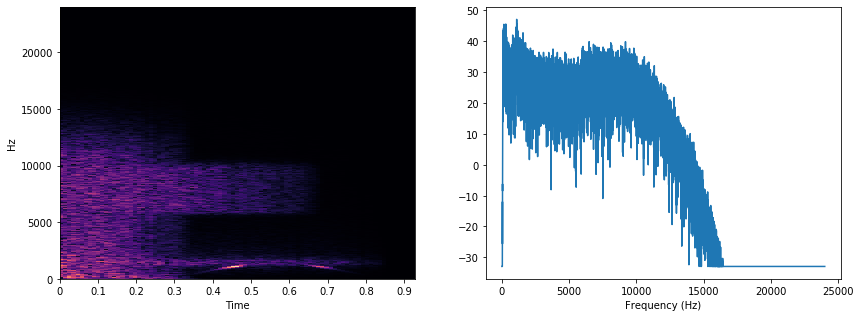

In [182]:
%%time
#generate 1 sound
import imp
imp.reload(pg)
imp.reload(hp)

out = dsp.buffer(length=1,channels=1)
params = []
stack_num = 4
params = [pg.RandomParams() for i in range(stack_num)]
for p in params:
    print(p.__dict__, "\n")
sound = pg.ensemble(params)

z = librosa.feature.rms(sound)
print(np.sum(sound),sound.shape)
hp.specShow(sound)
Audio(sound,rate = sr, autoplay = True)

# Mutation

{'oscType': 0, 'isNoise': 1, 'A': 1, 'D': 3, 'S': 1, 'R': 2, 'pitch_0': 98, 'pitch_1': 84, 'pitch_2': 104, 'pitch_3': 0, 'bpCutLow': 49, 'bpCutHigh': 54, 'bpOrder': 2, 'amplitude': 1, 'start': 1, 'length': 3, 'em_prob': 0.25, 'fm_prob': 0.25}
{'oscType': 0, 'isNoise': 0, 'A': 1, 'D': 2, 'S': 2, 'R': 3, 'pitch_0': 92, 'pitch_1': 76, 'pitch_2': 48, 'pitch_3': 0, 'bpCutLow': 22, 'bpCutHigh': 91, 'bpOrder': 1, 'amplitude': 1, 'start': 2, 'length': 2, 'em_prob': 0.75, 'fm_prob': 0.25}
{'oscType': 1, 'isNoise': 1, 'A': 1, 'D': 1, 'S': 2, 'R': 2, 'pitch_0': 78, 'pitch_1': 88, 'pitch_2': 48, 'pitch_3': 0, 'bpCutLow': 41, 'bpCutHigh': 97, 'bpOrder': 2, 'amplitude': 2, 'start': 9, 'length': 0, 'em_prob': 0.75, 'fm_prob': 0.75}
{'oscType': 0, 'isNoise': 1, 'A': 3, 'D': 0, 'S': 3, 'R': 2, 'pitch_0': 52, 'pitch_1': 28, 'pitch_2': 40, 'pitch_3': 0, 'bpCutLow': 20, 'bpCutHigh': 89, 'bpOrder': 1, 'amplitude': 3, 'start': 6, 'length': 3, 'em_prob': 0.25, 'fm_prob': 0.25}


<Figure size 576x360 with 0 Axes>

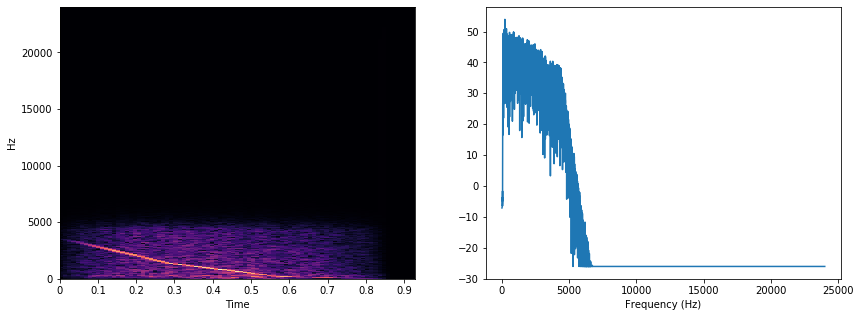

In [275]:
pm = [p.mutate(e=0.001, t=1) for p in params]
for p in pm:
    print(p.__dict__)
hp.specShow(pg.ensemble(params))
Audio(pg.ensemble(pm),rate=sr, autoplay=True)


### We can make random noise.
- But how do we select ones that sound like drums?
- We need a virtual ear!
    - Recognizes drums from not-drums
    - Given a drum, it can categorize the type of drum